<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Java_08_Inheritance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8: Inheritance and Polymorphism
## *To Infinity and Beyond (Your Base Class)*
**Brendan Shea, PhD**

---

### Learning Objectives

By the end of this chapter, you will be able to:

1. **Explain** what inheritance is and why it helps eliminate code duplication
2. **Write** subclasses using the `extends` keyword and identify what is (and isn't) inherited
3. **Use** `super()` to call a superclass constructor from a subclass
4. **Distinguish** between `public`, `private`, and `protected` access modifiers
5. **Override** superclass methods using `@Override` and explain how overriding differs from overloading
6. **Describe** the role of the `Object` class and override `toString()` and `equals()` appropriately
7. **Define** polymorphism and trace the output of programs that use superclass references with subclass objects
8. **Use** `instanceof` for type-checking and safely perform downcasting
9. **Write** abstract classes with a mix of abstract and concrete methods
10. **Create** and implement interfaces, and explain when to prefer an interface over an abstract class

## Introduction: Why Inheritance?

Pixar has made over two dozen films, and every single one is full of characters. Woody, Buzz, Sulley, Nemo, Elastigirl, Joy, Wall-E — they're all *characters*, which means they all have names, movies they come from, and things they say. But a Toy also has an owner. A Monster has a scare rating. A Superhero has a power. A Fish has a habitat.

Without inheritance, you'd copy and paste the shared fields (`name`, `movie`, `catchphrase`) into every single class. Add a `toString()` method? Do it six times. Fix a bug in `introduce()`? Hunt down six separate copies. That's exactly what we warned against in Chapter 4 with the **DRY Principle** (Don't Repeat Yourself).

**Inheritance** is Java's solution. You write the common stuff once in a **superclass** (or *parent class*), and then each specialized **subclass** (or *child class*) *extends* it — inheriting everything the parent has, then adding its own unique fields and behaviors.

By the end of this chapter, you'll see how this leads to one of the most powerful ideas in object-oriented programming: **polymorphism** — the ability to write code that works on *any* subclass, even ones that don't exist yet.

> **The Inheritance Principle:** Write shared code once in a superclass. Let subclasses extend it with their own unique additions. Never repeat yourself.

## 8.1 The `extends` Keyword

To create a subclass in Java, you add `extends SuperclassName` to the class declaration. Let's start with a `PixarCharacter` superclass that holds everything every character has in common:

```java
public class PixarCharacter {
    private String name;
    private String movie;
    private String catchphrase;

    public PixarCharacter(String name, String movie, String catchphrase) {
        this.name = name;
        this.movie = movie;
        this.catchphrase = catchphrase;
    }

    public void introduce() {
        System.out.println("Hi! I'm " + name + " from " + movie + ".");
        System.out.println("My catchphrase: \"" + catchphrase + "\"");
    }

    // Getters
    public String getName()       { return name; }
    public String getMovie()      { return movie; }
    public String getCatchphrase(){ return catchphrase; }
}
```

Now we create a `Toy` subclass that **extends** `PixarCharacter`. A `Toy` is a `PixarCharacter` — it has a name, movie, and catchphrase — but it also has an `owner` field that only toys need:

```java
public class Toy extends PixarCharacter {
    private String owner;   // Toy-specific field

    public Toy(String name, String movie, String catchphrase, String owner) {
        super(name, movie, catchphrase);  // Call the PixarCharacter constructor
        this.owner = owner;
    }

    public void getPlayed() {
        System.out.println(getName() + " is being played with by " + owner + "!");
    }
}
```

### Terminology

| Term | Also Called | Meaning |
|------|-------------|------------------------------------------|
| Superclass | Parent class, Base class | The class being extended |
| Subclass | Child class, Derived class | The class doing the extending |
| `extends` | — | Keyword that establishes the relationship |

### What Gets Inherited?

When a class extends a superclass, it automatically gains access to most of the superclass's members. Here's a precise breakdown:

| Member | Inherited? | Notes |
|--------|-----------|-------|
| `public` fields and methods | ✅ Yes | Fully available in the subclass |
| `protected` fields and methods | ✅ Yes | Available in the subclass and same package |
| Package-private (default) fields/methods | ⚠️ Same package only | Not available outside the package |
| `private` fields and methods | ❌ No (directly) | Hidden, but accessible via public getters/setters |
| Constructors | ❌ Never | Must be explicitly called with `super()` |

Notice that `private` fields are **not** directly accessible in the subclass. In the `Toy` example, `name` and `movie` are `private` in `PixarCharacter`, so `Toy` cannot write `this.name = ...`. Instead, it calls `getName()` — the public getter. This is intentional: the superclass retains control over its own data.

> **Design tip:** Keep fields `private` in the superclass and provide getters/setters. This preserves encapsulation even across an inheritance hierarchy.

## Class Diagram: PixarCharacter

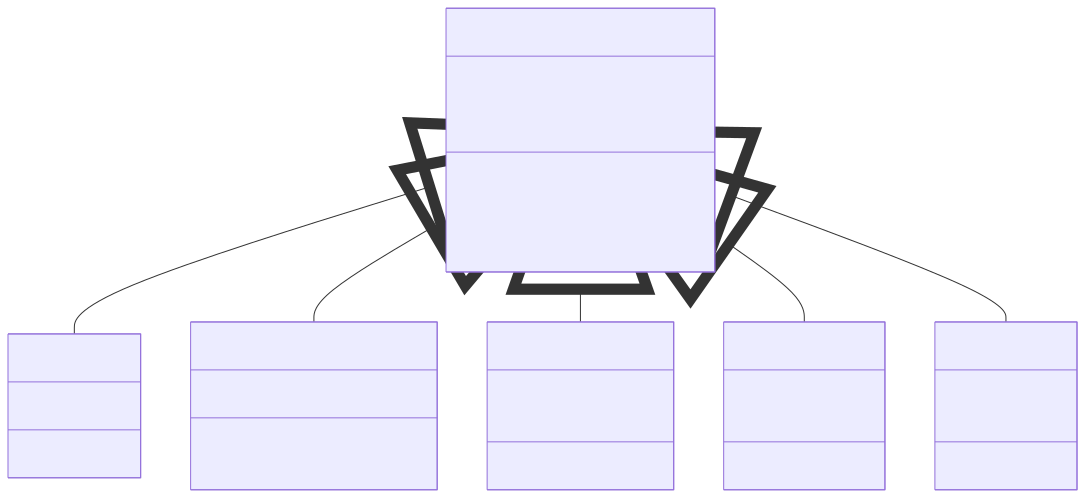

In [1]:
# @title
import base64
import requests
import json
from IPython.display import SVG, display

def mm(graph: str, width: str = "100%") -> None:
    """
    Fetch and display a Mermaid diagram with optional scaling.

    Parameters:
      graph (str): Mermaid graph definition.
      width (str): CSS width for the SVG (e.g., "100%", "800px").
                   Defaults to "75%" (full cell width).
    """
    # 1. Configuration to fix font clipping
    graph_data = {
        "code": graph,
        "mermaid": {
            "theme": "default",
            "themeVariables": {
                "fontFamily": "arial"
            }
        }
    }

    # 2. Encode
    json_str = json.dumps(graph_data)
    b64 = base64.urlsafe_b64encode(json_str.encode('utf-8')).decode('ascii')

    # 3. Fetch
    url = f'https://mermaid.ink/svg/{b64}'
    response = requests.get(url)

    if response.status_code == 200:
        display(SVG(data=response.text), metadata={"width": width})
    else:
        print(f"Error: {response.status_code}")

mm("""
classDiagram
    class PixarCharacter {
        -String name
        -String movie
        -String catchphrase
        +introduce()
        +getName() String
        +getMovie() String
        +getCatchphrase() String
    }
    class Toy {
        -String owner
        +getPlayed()
    }
    class Monster {
        -double scareRating
        +scare()
        +getScareRating() double
    }
    class Superhero {
        -String power
        -int strengthLevel
        +usePower()
    }
    class Fish {
        -String habitat
        -boolean canTalk
        +swim()
    }
    class Emotion {
        -String color
        -int intensity
        +feel()
    }
    PixarCharacter <|-- Toy
    PixarCharacter <|-- Monster
    PixarCharacter <|-- Superhero
    PixarCharacter <|-- Fish
    PixarCharacter <|-- Emotion""")


### The "is-a" Test

Inheritance models an **is-a** relationship. Before using `extends`, always ask: does the "is-a" sentence make sense?

- A `Toy` **is a** `PixarCharacter` ✅ — makes sense, use inheritance
- A `Monster` **is a** `PixarCharacter` ✅ — makes sense, use inheritance
- A `Wheel` **is a** `Car` ❌ — doesn't make sense, use composition instead

When the is-a test fails, the right relationship is usually **has-a** (composition): a `Car` **has a** `Wheel`, which you model by giving `Car` a `Wheel` field — not by extending it.

```java
// WRONG: Wheel is NOT a Car
public class Wheel extends Car { ... }   // ❌ Don't do this

// RIGHT: Car HAS-A Wheel
public class Car {
    private Wheel[] wheels;  // ✅ Composition
}
```

Misusing inheritance is one of the most common design mistakes in object-oriented programming. When in doubt, apply the is-a test.

## 8.2 Constructors and `super()`

Here's a fact that surprises almost every student: **constructors are never inherited.** When you create a `new Toy(...)`, Java must also initialize the `PixarCharacter` part of that object — but it can't do it automatically, because it doesn't know which constructor arguments to use.

Your job is to explicitly call the superclass constructor using `super(...)` as the **very first line** of the subclass constructor:

```java
public class Toy extends PixarCharacter {
    private String owner;

    public Toy(String name, String movie, String catchphrase, String owner) {
        super(name, movie, catchphrase);  // MUST BE FIRST — calls PixarCharacter constructor
        this.owner = owner;               // Now we can initialize Toy's own fields
    }
}
```

### What Happens If You Forget `super()`?

If you don't call `super(...)` yourself, Java automatically inserts `super()` (the no-argument version). This works *only* if the superclass has a no-argument constructor:

```java
// Case 1: Superclass HAS a no-arg constructor — compiles fine
public class PixarCharacter {
    public PixarCharacter() { ... }  // no-arg constructor exists
}

// Case 2: Superclass has NO no-arg constructor — compile ERROR!
public class PixarCharacter {
    public PixarCharacter(String name, String movie, String catchphrase) { ... }
    // No no-arg constructor! Subclass MUST call super(name, movie, catchphrase)
}
```

The error message you'll see: `error: constructor PixarCharacter in class PixarCharacter cannot be applied to given types`. This almost always means you forgot to call `super(...)` with the right arguments.

### Constructor Chaining

When you call `new Toy("Woody", "Toy Story", "To infinity and beyond!", "Andy")`, here is the exact sequence of events:

1. Java enters the `Toy` constructor
2. The first line — `super("Woody", "Toy Story", "To infinity and beyond!")` — immediately jumps to the `PixarCharacter` constructor
3. `PixarCharacter`'s constructor runs, setting `name`, `movie`, and `catchphrase`
4. Control returns to the `Toy` constructor, which continues with `this.owner = "Andy"`
5. The `Toy` object is fully initialized and ready to use

This is called **constructor chaining** — each constructor in the hierarchy calls its parent's constructor, all the way up. The superclass part of the object is always initialized *before* the subclass adds its own fields.

```java
Toy woody = new Toy("Woody", "Toy Story", "To infinity and beyond!", "Andy");
//         ↑
// 1. Toy constructor called
// 2. → PixarCharacter constructor runs (name, movie, catchphrase set)
// 3. ← Returns to Toy constructor (owner set)
// 4. woody is ready!

woody.introduce();   // Inherited from PixarCharacter — works!
woody.getPlayed();   // Toy's own method — also works!
```

# Graphic: Creating a Toy

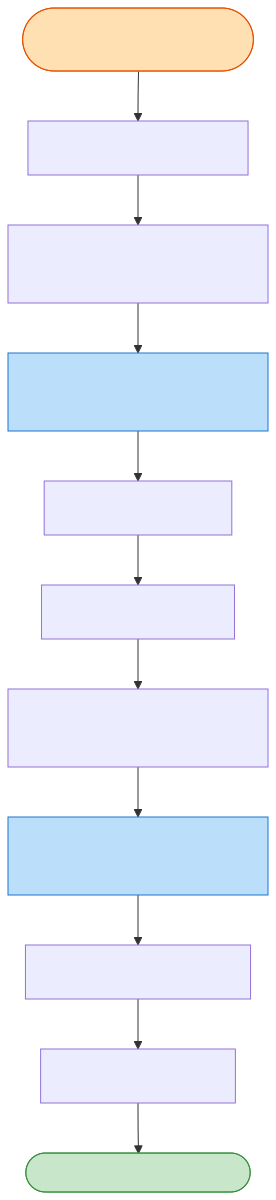

In [2]:
# @title
mm("""
flowchart TD
    A(["new Toy(name, movie, catchphrase, owner)"]) --> B["Toy constructor begins"]
    B --> C["super(name, movie, catchphrase)"]
    C --> D["PixarCharacter constructor begins"]
    D --> E["this.name = name"]
    E --> F["this.movie = movie"]
    F --> G["this.catchphrase = catchphrase"]
    G --> H["PixarCharacter constructor ends"]
    H --> I["Back in Toy constructor"]
    I --> J["this.owner = owner"]
    J --> K(["Toy object fully initialized ✅"])

    style A fill:#ffe0b2,stroke:#e65100
    style D fill:#bbdefb,stroke:#1976d2
    style H fill:#bbdefb,stroke:#1976d2
    style K fill:#c8e6c9,stroke:#388e3c
    """)

### 🚀 Program 1: Pixar Character Registry

This program builds a complete Pixar character hierarchy. We define a `PixarCharacter` superclass with shared fields and methods, then create `Toy`, `Monster`, and `Superhero` subclasses that each add their own fields and unique behaviors. Pay attention to how `super()` is called in each subclass constructor, and how the subclass objects can call both inherited methods and their own new methods.

In [3]:
%%writefile PixarRegistry.java
public class PixarRegistry {

    // ── Superclass ──────────────────────────────────────────────────────────
    static class PixarCharacter {
        private String name;
        private String movie;
        private String catchphrase;

        public PixarCharacter(String name, String movie, String catchphrase) {
            this.name = name;
            this.movie = movie;
            this.catchphrase = catchphrase;
        }

        public void introduce() {
            System.out.println("Hi! I'm " + name + " from " + movie + ".");
            System.out.println("  Catchphrase: \"" + catchphrase + "\"");
        }

        public String getName()       { return name; }
        public String getMovie()      { return movie; }
        public String getCatchphrase(){ return catchphrase; }
    }

    // ── Subclass: Toy ────────────────────────────────────────────────────────
    static class Toy extends PixarCharacter {
        private String owner;

        public Toy(String name, String movie, String catchphrase, String owner) {
            super(name, movie, catchphrase);   // Initialize PixarCharacter fields
            this.owner = owner;                // Toy's own field
        }

        public void getPlayed() {
            System.out.println(getName() + " is being played with by " + owner + "! 🎮");
        }

        public String getOwner() { return owner; }
    }

    // ── Subclass: Monster ────────────────────────────────────────────────────
    static class Monster extends PixarCharacter {
        private double scareRating;   // out of 10.0

        public Monster(String name, String movie, String catchphrase, double scareRating) {
            super(name, movie, catchphrase);
            this.scareRating = scareRating;
        }

        public void scare() {
            System.out.println(getName() + " jumps out: BOO! (Scare rating: "
                               + scareRating + "/10) 👾");
        }

        public double getScareRating() { return scareRating; }
    }

    // ── Subclass: Superhero ──────────────────────────────────────────────────
    static class Superhero extends PixarCharacter {
        private String power;
        private int strengthLevel;

        public Superhero(String name, String movie, String catchphrase,
                         String power, int strengthLevel) {
            super(name, movie, catchphrase);
            this.power = power;
            this.strengthLevel = strengthLevel;
        }

        public void usePower() {
            System.out.println(getName() + " uses " + power
                               + "! (Strength: " + strengthLevel + ") 💥");
        }

        public String getPower()      { return power; }
        public int getStrengthLevel() { return strengthLevel; }
    }

    // ── Main ─────────────────────────────────────────────────────────────────
    public static void main(String[] args) {
        System.out.println("=== Pixar Character Registry ===");
        System.out.println();

        Toy woody = new Toy("Woody", "Toy Story",
                            "To infinity and beyond!", "Andy");
        Monster sulley = new Monster("Sulley", "Monsters, Inc.",
                                     "Kitty!", 9.7);
        Superhero mrIncredible = new Superhero("Mr. Incredible", "The Incredibles",
                                               "I still got it!", "Super strength", 95);

        // Inherited methods work on all three
        woody.introduce();
        System.out.println();
        sulley.introduce();
        System.out.println();
        mrIncredible.introduce();
        System.out.println();

        // Subclass-specific methods
        System.out.println("--- Special Abilities ---");
        woody.getPlayed();
        sulley.scare();
        mrIncredible.usePower();
    }
}


Writing PixarRegistry.java


In [4]:
!javac PixarRegistry.java
!java PixarRegistry

=== Pixar Character Registry ===

Hi! I'm Woody from Toy Story.
  Catchphrase: "To infinity and beyond!"

Hi! I'm Sulley from Monsters, Inc..
  Catchphrase: "Kitty!"

Hi! I'm Mr. Incredible from The Incredibles.
  Catchphrase: "I still got it!"

--- Special Abilities ---
Woody is being played with by Andy! 🎮
Sulley jumps out: BOO! (Scare rating: 9.7/10) 👾
Mr. Incredible uses Super strength! (Strength: 95) 💥


### 📝 Problem 1: Finding Nemo's Family

The starter code below gives you the `PixarCharacter` superclass from Program 1 (included inside the file). Your tasks:

1. **Complete the `Fish` subclass:**
   - Add fields: `String habitat` and `boolean canTalk`
   - Write a constructor that calls `super(name, movie, catchphrase)` and initializes the new fields
   - Write a `swim()` method that prints something like: `"Nemo swims through the coral reef!"`
   - Write a `describe()` method that prints habitat and whether the fish can talk

2. **Create an `Emotion` subclass from scratch:**
   - Fields: `String color` and `int intensity` (1-10)
   - Constructor calling `super()`, plus initializing new fields
   - A `feel()` method that prints something about the emotion

3. **In `main`, create and test:**
   - Nemo (habitat: coral reef, can't talk — wait, he can)
   - Dory (habitat: open ocean, can talk)
   - Joy (color: yellow, intensity: 10)
   - Anger (color: red, intensity: 8)
   - Call `introduce()`, `swim()`, `describe()`, and `feel()` appropriately

In [ ]:
%%writefile NemoFamily.java
public class NemoFamily {

    static class PixarCharacter {
        private String name;
        private String movie;
        private String catchphrase;

        public PixarCharacter(String name, String movie, String catchphrase) {
            this.name = name;
            this.movie = movie;
            this.catchphrase = catchphrase;
        }

        public void introduce() {
            System.out.println("Hi! I'm " + name + " from " + movie + ".");
            System.out.println("  Catchphrase: \"" + catchphrase + "\"");
        }

        public String getName()  { return name; }
        public String getMovie() { return movie; }
        public String getCatchphrase() { return catchphrase; }
    }

    // TODO: Create the Fish subclass here
    // Fields: String habitat, boolean canTalk
    // Constructor: calls super(), initializes new fields
    // Methods: swim(), describe()

    // TODO: Create the Emotion subclass here
    // Fields: String color, int intensity
    // Constructor: calls super(), initializes new fields
    // Methods: feel()

    public static void main(String[] args) {
        // TODO: Create Nemo, Dory, Joy, and Anger objects
        // TODO: Call introduce(), swim() / feel(), and describe() on each
    }
}


In [ ]:
!javac NemoFamily.java
!java NemoFamily

## 8.3 The `protected` Modifier

You already know `public` (accessible everywhere) and `private` (accessible only within the class). Java has a third option: **`protected`**, which falls in between.

| Modifier | Same Class | Same Package | Subclass | Anywhere |
|----------|:----------:|:------------:|:--------:|:--------:|
| `public` | ✅ | ✅ | ✅ | ✅ |
| `protected` | ✅ | ✅ | ✅ | ❌ |
| (none / package) | ✅ | ✅ | ❌ | ❌ |
| `private` | ✅ | ❌ | ❌ | ❌ |

A `protected` field or method is accessible in the class itself, in any subclass, and in any class in the same package — but not from arbitrary outside code.

```java
public class PixarCharacter {
    protected String name;  // Subclasses can access this directly
    private String secretCode;  // Only PixarCharacter itself can touch this
}

public class Toy extends PixarCharacter {
    public void printName() {
        System.out.println(name);        // ✅ OK — name is protected
        System.out.println(secretCode);  // ❌ Compile error — secretCode is private
    }
}
```

**Best practice:** Keep fields `private` in the superclass and provide `protected` or `public` getters. This maintains encapsulation even for subclasses. Reserve `protected` fields for cases where subclasses genuinely need direct access and you trust all future subclass authors.

## 8.4 Method Overriding

**Overriding** means a subclass provides its own version of a method that already exists in the superclass. The subclass version *replaces* the superclass version when called on that subclass's objects.

### Override vs. Overload — Don't Confuse Them!

| Concept | What It Is | Signature |
|---------|-----------|----------|
| **Overriding** | Subclass redefines a superclass method | Same name, same parameters, same return type |
| **Overloading** | Same class has multiple methods with same name | Same name, **different** parameters |

### The `@Override` Annotation

Always put `@Override` before an overriding method. It isn't required, but it tells the compiler: "I believe this method overrides a superclass method — check it for me." If you misspell the method name or use the wrong parameters, the compiler will catch it:

```java
@Override
public void introduce() {   // If we wrote introduse() by mistake, compiler catches it!
    System.out.println("I'm " + getName() + ", and I belong to " + owner);
}
```

Without `@Override`, a typo would silently create a new *overloaded* method instead of overriding — a very hard bug to find.

### Overriding Rules

The overriding method must have the same name, the same parameter list, and the same (or a more specific) return type. The access level cannot be more restrictive than the superclass version — you can make a `protected` method `public`, but not `private`.

### Overriding in Action

Our `PixarCharacter.introduce()` prints a generic message. Each subclass can override it to include its own specific information:

```java
// In PixarCharacter:
public void introduce() {
    System.out.println("Hi! I'm " + getName() + " from " + getMovie() + ".");
}

// In Toy (overrides the superclass version):
@Override
public void introduce() {
    System.out.println("Hi! I'm " + getName() + ", a toy who belongs to " + owner + "!");
}

// In Monster (different override):
@Override
public void introduce() {
    System.out.println("Raaar! I'm " + getName() + "! Scare rating: " + scareRating + "/10");
}
```

Now when you call `introduce()` on a `Toy`, you get the Toy version — and when you call it on a `Monster`, you get the Monster version. The superclass version is never called (unless you explicitly invoke it with `super.introduce()`).

### Calling the Superclass Version with `super.method()`

Often you want to do everything the parent does, *plus* more. Instead of copy-pasting the parent's logic, call `super.introduce()` first:

```java
@Override
public void introduce() {
    super.introduce();    // Runs PixarCharacter's introduce() first
    System.out.println("  I belong to: " + owner);  // Then adds Toy-specific info
}
```

This keeps your code DRY — if `PixarCharacter.introduce()` changes, the subclass automatically picks up the change.

### 🚀 Program 2: Pixar Talent Show

This program demonstrates overriding in action. `PixarCharacter` has both `introduce()` and `perform()` methods. Each subclass overrides them with character-specific behavior. Notice how `Toy.introduce()` uses `super.introduce()` to call the parent version first — a common and clean pattern. Watch the output carefully: the same method name produces completely different results depending on which subclass is calling it.

In [5]:
%%writefile TalentShow.java
public class TalentShow {

    static class PixarCharacter {
        private String name;
        private String movie;
        private String catchphrase;

        public PixarCharacter(String name, String movie, String catchphrase) {
            this.name = name;
            this.movie = movie;
            this.catchphrase = catchphrase;
        }

        public void introduce() {
            System.out.println("[" + movie + "] " + name
                               + " says: \"" + catchphrase + "\"");
        }

        public void perform() {
            System.out.println(name + " waves to the crowd.");
        }

        public String getName()  { return name; }
        public String getMovie() { return movie; }
    }

    static class Toy extends PixarCharacter {
        private String owner;

        public Toy(String name, String movie, String catchphrase, String owner) {
            super(name, movie, catchphrase);
            this.owner = owner;
        }

        @Override
        public void introduce() {
            super.introduce();    // Calls PixarCharacter's introduce() first
            System.out.println("  (I belong to " + owner + "!)");
        }

        @Override
        public void perform() {
            System.out.println(getName() + " does the cowboy quick-draw! 🤠");
        }
    }

    static class Monster extends PixarCharacter {
        private double scareRating;

        public Monster(String name, String movie, String catchphrase, double scareRating) {
            super(name, movie, catchphrase);
            this.scareRating = scareRating;
        }

        @Override
        public void introduce() {
            // Doesn't use super — completely replaces the parent version
            System.out.println("ROAR! I'm " + getName() + "! Scare rating: "
                               + scareRating + "/10 👾");
        }

        @Override
        public void perform() {
            System.out.println(getName() + " lets out a terrifying roar! The crowd screams! 😱");
        }
    }

    static class Superhero extends PixarCharacter {
        private String power;

        public Superhero(String name, String movie, String catchphrase, String power) {
            super(name, movie, catchphrase);
            this.power = power;
        }

        @Override
        public void introduce() {
            super.introduce();
            System.out.println("  (My superpower: " + power + ")");
        }

        @Override
        public void perform() {
            System.out.println(getName() + " demonstrates " + power + " on stage! 💥");
        }
    }

    public static void main(String[] args) {
        System.out.println("====== Pixar Talent Show ======");
        System.out.println();

        Toy buzz = new Toy("Buzz Lightyear", "Toy Story",
                           "To infinity and beyond!", "Andy");
        Monster mike = new Monster("Mike Wazowski", "Monsters, Inc.",
                                   "I'm watching you, Wazowski!", 7.2);
        Superhero violet = new Superhero("Violet", "The Incredibles",
                                         "I'm not a nobody.", "Invisibility & force fields");

        PixarCharacter[] lineup = { buzz, mike, violet };

        for (PixarCharacter c : lineup) {
            System.out.println("--- Next up! ---");
            c.introduce();    // Overridden version runs for each type
            c.perform();      // Overridden version runs for each type
            System.out.println();
        }
    }
}


Writing TalentShow.java


In [6]:
!javac TalentShow.java
!java TalentShow

====== Pixar Talent Show ======

--- Next up! ---
[Toy Story] Buzz Lightyear says: "To infinity and beyond!"
  (I belong to Andy!)
Buzz Lightyear does the cowboy quick-draw! 🤠

--- Next up! ---
ROAR! I'm Mike Wazowski! Scare rating: 7.2/10 👾
Mike Wazowski lets out a terrifying roar! The crowd screams! 😱

--- Next up! ---
[The Incredibles] Violet says: "I'm not a nobody."
  (My superpower: Invisibility & force fields)
Violet demonstrates Invisibility & force fields on stage! 💥



## 8.5 The `Object` Class

Here's something that might surprise you: even when you write `public class PixarCharacter` with no `extends`, Java quietly adds one:

```java
public class PixarCharacter extends Object { ... }   // This is what Java really sees
```

Every class in Java ultimately extends `java.lang.Object`. This means every object you ever create has a handful of built-in methods inherited from `Object`. The two most important for now:

| Method | Default Behavior | Why You Should Override It |
|--------|-----------------|---------------------------|
| `toString()` | Returns something like `PixarCharacter@6d06d69c` | So `println(obj)` prints something readable |
| `equals(Object o)` | Returns `true` only if the two variables point to the same object in memory | So you can compare objects by their field values |
| `hashCode()` | Returns a hash based on memory address | Should be overridden whenever `equals()` is |
| `getClass()` | Returns the runtime class of the object | Rarely overridden — already useful |

The defaults for `toString()` and `equals()` are almost never what you want. Fortunately, overriding them is straightforward.

### Overriding `toString()`

When you pass any object to `System.out.println()`, Java automatically calls `toString()` on it. The default version returns an ugly string like `PixarCharacter@6d06d69c`. By overriding it, you control what gets printed:

```java
// Before overriding:
PixarCharacter woody = new PixarCharacter("Woody", "Toy Story", "Reach for the sky!");
System.out.println(woody);  // Prints: PixarCharacter@6d06d69c  (not helpful!)

// After overriding:
@Override
public String toString() {
    return name + " (" + movie + ")";
}

System.out.println(woody);  // Now prints: Woody (Toy Story)  ✅
```

`toString()` is also called automatically when you concatenate an object with a String:

```java
System.out.println("Character: " + woody);  // Calls woody.toString() automatically
```

### Overriding `equals()`

By default, `==` and `.equals()` on objects both check **reference equality** — do these two variables point to the exact same object in memory? Usually, you want **value equality** — do these two objects have the same data?

```java
PixarCharacter a = new PixarCharacter("Woody", "Toy Story", "Reach for the sky!");
PixarCharacter b = new PixarCharacter("Woody", "Toy Story", "Reach for the sky!");

System.out.println(a == b);        // false — different objects in memory
System.out.println(a.equals(b));   // false (default) — same as ==
```

Here's the standard pattern for overriding `equals()`:

```java
@Override
public boolean equals(Object obj) {
    if (this == obj) return true;              // Same reference? Definitely equal.
    if (obj == null) return false;             // Can't be equal to null.
    if (!(obj instanceof PixarCharacter)) return false;  // Wrong type? Not equal.
    PixarCharacter other = (PixarCharacter) obj;  // Safe to cast now.
    return name.equals(other.name) && movie.equals(other.movie);
}
```

> **Note:** Whenever you override `equals()`, you should also override `hashCode()` to keep Java's data structures working correctly. The rule: if two objects are equal, they must have the same hash code. A simple approach is to use `Objects.hash(name, movie)` from `java.util.Objects`.

### 📝 Problem 2: The Incredibles ID System

The starter code gives you a `Superhero` class with `name`, `power`, and `strengthLevel` fields. Your tasks:

1. **Override `toString()`** to return a formatted string like:
   `"Mr. Incredible | Power: Super strength | Strength: 95"`

2. **Override `equals()`** following the standard pattern, comparing by `name` and `power` only (strength level may vary).

3. **Write a static method `findStrongest(Superhero[] heroes)`** that loops through the array and returns the `Superhero` with the highest `strengthLevel`. Use the overridden `toString()` to print the winner.

4. **In `main`, test with:** Mr. Incredible (super strength, 95), Elastigirl (elasticity, 80), Violet (invisibility, 70), Dash (super speed, 85), Frozone (ice powers, 78). Also test `equals()` with two Superhero objects that have the same name and power.

In [ ]:
%%writefile IncrediblesID.java
public class IncrediblesID {

    static class Superhero {
        private String name;
        private String power;
        private int strengthLevel;

        public Superhero(String name, String power, int strengthLevel) {
            this.name = name;
            this.power = power;
            this.strengthLevel = strengthLevel;
        }

        public String getName()      { return name; }
        public String getPower()     { return power; }
        public int getStrengthLevel(){ return strengthLevel; }

        // TODO 1: Override toString()
        // Format: "Name | Power: X | Strength: Y"

        // TODO 2: Override equals()
        // Two Superheroes are equal if they have the same name and power

        // TODO 3: Write static findStrongest(Superhero[] heroes)
        // Returns the Superhero with the highest strengthLevel
    }

    public static void main(String[] args) {
        // TODO 4: Create 5 Superhero objects and test your methods
        // Test toString() by printing each hero
        // Test findStrongest() and print the result
        // Test equals() with two heroes that have the same name and power
    }
}


In [ ]:
!javac IncrediblesID.java
!java IncrediblesID

## 8.6 Polymorphism

The word **polymorphism** comes from Greek: *poly* = many, *morph* = form. In Java, it means that the same method call can behave differently depending on the actual type of the object.

Here's the key insight: because a `Toy` **is a** `PixarCharacter`, you can store a `Toy` in a `PixarCharacter` variable:

```java
PixarCharacter c = new Toy("Woody", "Toy Story", "Reach for the sky!", "Andy");
```

This is perfectly legal. The variable `c` is of type `PixarCharacter`, but the *object* it points to is a `Toy`. Now watch what happens when you call `introduce()`:

```java
c.introduce();   // Which version runs — PixarCharacter's or Toy's?
```

**Java calls Toy's version.** Even though the variable is declared as `PixarCharacter`, Java looks at the *actual type of the object at runtime* — the `Toy` — and calls its overridden method. This is called **dynamic dispatch** (or late binding), and it's what makes polymorphism powerful.

> **The core rule:** The variable type determines *what methods you're allowed to call*. The object type determines *which version runs.*

### Superclass References, Subclass Objects

The is-a relationship determines which assignments are legal:

| Code | Legal? | Why |
|------|:------:|-----|
| `PixarCharacter c = new Toy(...)` | ✅ | A Toy IS-A PixarCharacter |
| `PixarCharacter c = new Monster(...)` | ✅ | A Monster IS-A PixarCharacter |
| `Toy t = new PixarCharacter(...)` | ❌ | A PixarCharacter is NOT necessarily a Toy |
| `Monster m = new Toy(...)` | ❌ | A Toy is not a Monster |

When you store a `Toy` in a `PixarCharacter` variable, you can only call the methods defined in `PixarCharacter` — even though the object underneath is a `Toy`. The subclass-specific method `getPlayed()` is hidden behind the `PixarCharacter` reference:

```java
PixarCharacter c = new Toy("Woody", "Toy Story", "Reach for the sky!", "Andy");
c.introduce();    // ✅ Calls Toy's overridden introduce()
c.getPlayed();    // ❌ Compile error! PixarCharacter has no getPlayed() method
```

To access `getPlayed()`, you'd need to downcast (covered soon in the `instanceof` section).

## Graphic: Polymorphism

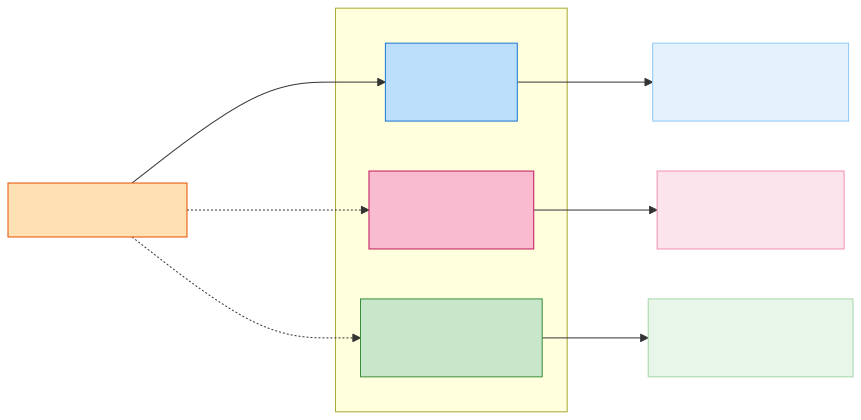

In [7]:
# @title
mm("""
flowchart LR
    REF["PixarCharacter c"]

    subgraph Objects in Memory
        TOY["Toy object\n(Woody)"]
        MON["Monster object\n(Sulley)"]
        HERO["Superhero object\n(Mr. Incredible)"]
    end

    REF -->|"c.perform() →"| TOY
    REF -.->|"c.perform() →"| MON
    REF -.->|"c.perform() →"| HERO

    TOY -->|"runs"| T_PERF["Toy.perform()\ncowboy quick-draw"]
    MON -->|"runs"| M_PERF["Monster.perform()\nterrifying roar"]
    HERO -->|"runs"| H_PERF["Superhero.perform()\ndemonstrates power"]

    style REF fill:#ffe0b2,stroke:#e65100
    style TOY fill:#bbdefb,stroke:#1976d2
    style MON fill:#f8bbd0,stroke:#c2185b
    style HERO fill:#c8e6c9,stroke:#388e3c
    style T_PERF fill:#e3f2fd,stroke:#90caf9
    style M_PERF fill:#fce4ec,stroke:#f48fb1
    style H_PERF fill:#e8f5e9,stroke:#a5d6a7""")

### Polymorphism with Arrays and Loops

The real power of polymorphism comes when you combine it with arrays. You can store objects of different subclasses in a single `PixarCharacter[]` array and loop through them — calling the same method name on each, but getting different behavior:

```java
PixarCharacter[] cast = {
    new Toy("Woody", "Toy Story", "Reach for the sky!", "Andy"),
    new Monster("Sulley", "Monsters, Inc.", "Kitty!", 9.7),
    new Superhero("Elastigirl", "The Incredibles", "Pull yourself together!", "Elasticity")
};

for (PixarCharacter c : cast) {
    c.perform();   // Each object calls its OWN overridden version
}
```

Output:
```
Woody does the cowboy quick-draw! 🤠
Sulley lets out a terrifying roar! The crowd screams! 😱
Elastigirl demonstrates Elasticity on stage! 💥
```

Three different outputs from three calls to `c.perform()`. This is polymorphism in action. Without overriding, every call would produce the same generic output. Without polymorphism, you'd need a separate array and separate loop for each subclass type.

### Type Checking with `instanceof`

Sometimes you need to know the actual runtime type of an object — for example, to call a method that only exists in one subclass. The `instanceof` operator returns `true` if an object is of a given type (or a subtype):

```java
PixarCharacter c = new Toy("Woody", "Toy Story", "Reach for the sky!", "Andy");

System.out.println(c instanceof Toy);           // true
System.out.println(c instanceof PixarCharacter); // true (Toy IS-A PixarCharacter)
System.out.println(c instanceof Monster);        // false
```

After verifying the type with `instanceof`, you can **downcast** to access subclass-specific methods:

```java
if (c instanceof Toy) {
    Toy t = (Toy) c;   // Safe downcast — we checked first!
    t.getPlayed();     // Now we can call Toy-specific methods
}
```

**Warning:** Never downcast without checking `instanceof` first. If the object isn't actually of that type, Java will throw a `ClassCastException` at runtime:

```java
Monster m = (Monster) c;  // ❌ ClassCastException! c is a Toy, not a Monster
```

> **Java 16+ shortcut (pattern matching):** Modern Java lets you combine the check and cast: `if (c instanceof Toy t) { t.getPlayed(); }` — the cast happens automatically inside the `if` block.

### 🚀 Program 3: Pixar Movie Night

This program builds a mixed array of Pixar characters and demonstrates the full power of polymorphism. It iterates polymorphically, calling overridden methods on each character, then uses `instanceof` to trigger subclass-specific behaviors — only Toys get played with, only Monsters scare people, only Superheroes save the day.

In [8]:
%%writefile MovieNight.java
public class MovieNight {

    static class PixarCharacter {
        private String name;
        private String movie;

        public PixarCharacter(String name, String movie) {
            this.name = name;
            this.movie = movie;
        }

        public void perform() {
            System.out.println(name + " takes a bow. 🎭");
        }

        @Override
        public String toString() {
            return name + " (" + movie + ")";
        }

        public String getName()  { return name; }
        public String getMovie() { return movie; }
    }

    static class Toy extends PixarCharacter {
        private String owner;

        public Toy(String name, String movie, String owner) {
            super(name, movie);
            this.owner = owner;
        }

        @Override
        public void perform() {
            System.out.println(getName() + " strikes a heroic pose for " + owner + "! 🤠");
        }

        public void getPlayed() {
            System.out.println("  → " + getName() + " is being played with by " + owner + "!");
        }
    }

    static class Monster extends PixarCharacter {
        private double scareRating;

        public Monster(String name, String movie, double scareRating) {
            super(name, movie);
            this.scareRating = scareRating;
        }

        @Override
        public void perform() {
            System.out.println(getName() + " unleashes a roar! (Scare rating: "
                               + scareRating + ") 👾");
        }

        public void scare() {
            System.out.println("  → BOO! " + getName() + " jumps out from the shadows!");
        }
    }

    static class Superhero extends PixarCharacter {
        private String power;

        public Superhero(String name, String movie, String power) {
            super(name, movie);
            this.power = power;
        }

        @Override
        public void perform() {
            System.out.println(getName() + " soars overhead using " + power + "! 💥");
        }

        public void save() {
            System.out.println("  → " + getName() + " saves the day with " + power + "!");
        }
    }

    public static void main(String[] args) {
        // A mixed array — polymorphism makes this possible!
        PixarCharacter[] movieNight = {
            new Toy("Woody", "Toy Story", "Andy"),
            new Toy("Buzz Lightyear", "Toy Story", "Andy"),
            new Monster("Sulley", "Monsters, Inc.", 9.7),
            new Monster("Mike", "Monsters, Inc.", 7.2),
            new Superhero("Mr. Incredible", "The Incredibles", "super strength"),
            new Superhero("Elastigirl", "The Incredibles", "elasticity")
        };

        System.out.println("=== Pixar Movie Night Parade ===");
        System.out.println();

        // Polymorphic loop — same method call, different behavior for each type
        for (PixarCharacter c : movieNight) {
            System.out.println("Character: " + c);  // Uses overridden toString()
            c.perform();                             // Polymorphic dispatch

            // instanceof to trigger subclass-specific actions
            if (c instanceof Toy) {
                Toy t = (Toy) c;
                t.getPlayed();
            } else if (c instanceof Monster) {
                Monster m = (Monster) c;
                m.scare();
            } else if (c instanceof Superhero) {
                Superhero s = (Superhero) c;
                s.save();
            }
            System.out.println();
        }

        // Count by type
        int toys = 0, monsters = 0, superheroes = 0;
        for (PixarCharacter c : movieNight) {
            if (c instanceof Toy)       toys++;
            else if (c instanceof Monster)   monsters++;
            else if (c instanceof Superhero) superheroes++;
        }
        System.out.println("=== Attendance ===");
        System.out.println("Toys: " + toys + ", Monsters: " + monsters
                           + ", Superheroes: " + superheroes);
    }
}


Writing MovieNight.java


In [9]:
!javac MovieNight.java
!java MovieNight

=== Pixar Movie Night Parade ===

Character: Woody (Toy Story)
Woody strikes a heroic pose for Andy! 🤠
  → Woody is being played with by Andy!

Character: Buzz Lightyear (Toy Story)
Buzz Lightyear strikes a heroic pose for Andy! 🤠
  → Buzz Lightyear is being played with by Andy!

Character: Sulley (Monsters, Inc.)
Sulley unleashes a roar! (Scare rating: 9.7) 👾
  → BOO! Sulley jumps out from the shadows!

Character: Mike (Monsters, Inc.)
Mike unleashes a roar! (Scare rating: 7.2) 👾
  → BOO! Mike jumps out from the shadows!

Character: Mr. Incredible (The Incredibles)
Mr. Incredible soars overhead using super strength! 💥
  → Mr. Incredible saves the day with super strength!

Character: Elastigirl (The Incredibles)
Elastigirl soars overhead using elasticity! 💥
  → Elastigirl saves the day with elasticity!

=== Attendance ===
Toys: 2, Monsters: 2, Superheroes: 2


### 📝 Problem 3: Pixar Parade

The starter code gives you the class hierarchy from Program 3. Your tasks:

1. **In `runParade(PixarCharacter[] cast)`:**
   - Loop through the array and print each character using its overridden `toString()` (polymorphic)
   - Count how many of each type are present using `instanceof`
   - Call each character's `perform()` method (polymorphic)
   - After the loop, use `instanceof` again to trigger each character's unique action (`getPlayed()`, `scare()`, or `save()`)
   - Print a summary: "Parade contained: X toys, Y monsters, Z superheroes"

2. **In `main`, create an array of 6+ mixed characters** (at least 2 of each type) and call `runParade()`.

3. **Bonus:** Write a `findByMovie(PixarCharacter[] cast, String movie)` method that returns a new array containing only characters from a specific movie. Test it with `"Toy Story"` and print the results.

In [ ]:
%%writefile PixarParade.java
public class PixarParade {

    // (Same class hierarchy as Program 3 — copy it in, or write your own)
    // PixarCharacter, Toy, Monster, Superhero with perform(), toString(), and unique methods

    // TODO: Write runParade(PixarCharacter[] cast)
    //   - Print each character (polymorphic toString)
    //   - Count by type using instanceof
    //   - Call perform() on each (polymorphic)
    //   - Trigger each type's unique action
    //   - Print type summary

    // BONUS: Write findByMovie(PixarCharacter[] cast, String movie)
    //   - Returns array of characters from that movie

    public static void main(String[] args) {
        // TODO: Create 6+ characters (2+ of each type) and call runParade()
        // BONUS: Call findByMovie() and print results
    }
}


In [ ]:
!javac PixarParade.java
!java PixarParade

## 8.7 Abstract Classes

### The Problem with Default Implementations

What should `PixarCharacter.perform()` do by default? Print "I perform"? That's meaningless — and worse, it's a trap. If you forget to override it in a subclass, you'll call that useless default and not even realize it.

Sometimes there is **no sensible default** for a method. You know every subclass *must* have that method, but you have no idea what it should do in the abstract. You want to *force* every subclass to provide its own version.

That's exactly what `abstract` does.

### Abstract Methods and Classes

An **abstract method** has no body — just a signature followed by a semicolon:

```java
public abstract void perform();   // No body — subclasses MUST implement this
```

Any class that contains an abstract method must itself be declared `abstract`:

```java
public abstract class PixarCharacter {
    private String name;
    private String movie;

    // Concrete constructor — abstract classes CAN have constructors
    public PixarCharacter(String name, String movie) {
        this.name = name;
        this.movie = movie;
    }

    // Concrete method — abstract classes CAN have implemented methods
    public void introduce() {
        System.out.println("Hi! I'm " + name + " from " + movie + ".");
    }

    // Abstract method — subclasses MUST implement this
    public abstract void perform();

    public String getName()  { return name; }
    public String getMovie() { return movie; }
}
```

### Rules for Abstract Classes

| Rule | Details |
|------|---------|
| Cannot be instantiated | `new PixarCharacter(...)` → compile error |
| Subclasses must override all abstract methods | Or they must also be declared `abstract` |
| Can have concrete methods and fields | It's not "all abstract" — it's a mix |
| Can have constructors | Called via `super()` from subclasses |
| Polymorphism still works | `PixarCharacter c = new Toy(...)` is still legal |

### When to Use Abstract Classes

Use an abstract class when:
- You want to share code (fields, concrete methods) among related classes
- You also want to *require* certain methods to be implemented by subclasses
- All the classes share a common identity (they all "are" the same kind of thing)

| Design Choice | What It Provides | When to Use |
|---------------|-----------------|-------------|
| Regular superclass | Shared code, no requirements | You have a useful default for every method |
| Abstract class | Shared code + required methods | Some methods have no sensible default |
| Interface (next section) | Requirements only, minimal sharing | You're defining a capability, not an identity |

## 8.8 Interfaces

### What Is an Interface?

An **interface** is a pure contract: it lists method signatures that any implementing class *promises* to provide. It's not about what a class *is*, but about what it *can do*.

```java
public interface Quotable {
    String getQuote();  // No body, no access modifier needed — implicitly public abstract
}

public interface Rescuable {
    void rescue(String who);
    boolean canFly();
}
```

A class declares that it fulfills an interface's contract using `implements`:

```java
public class Superhero extends PixarCharacter implements Quotable, Rescuable {
    // Must implement: getQuote(), rescue(), canFly()
    // (Plus: inherits PixarCharacter's methods and fields)
}
```

If a class claims to implement an interface but doesn't provide all the required methods, it won't compile — Java enforces the contract.

### Why Interfaces?

Java allows a class to extend **only one** superclass. But a class can implement **as many interfaces as it wants**:

```java
public class Toy extends PixarCharacter implements Collectible, Playable, Quotable {
    // A Toy is a PixarCharacter AND it's Collectible AND Playable AND Quotable
}
```

This solves the **multiple inheritance problem**: in some languages you can extend multiple classes, which creates terrible ambiguities (what if both parents have the same method?). Java avoids this by allowing only single class inheritance, but unlimited interface implementation.

Interfaces are also great for writing code that works with objects of completely different class hierarchies. Suppose you have `PixarCharacter` and `DisneyCharacter` — totally separate hierarchies. If both implement `Performable`, you can write a single method that accepts any `Performable` object, regardless of where it came from:

```java
public static void runShow(Performable[] performers) {
    for (Performable p : performers) {
        p.perform();   // Works for Pixar AND Disney characters!
    }
}
```

### Abstract Classes vs. Interfaces

| Feature | Abstract Class | Interface |
|---------|---------------|----------|
| Keyword | `extends` | `implements` |
| How many per class | One only | Unlimited |
| Can have instance fields | ✅ Yes | ❌ No (only constants) |
| Can have constructors | ✅ Yes | ❌ No |
| Concrete methods | ✅ Yes | ✅ Yes (via `default`) |
| Abstract methods | ✅ Yes | ✅ All methods abstract by default |
| Relationship | "is-a" (identity) | "can-do" (capability) |
| Polymorphism | ✅ Works | ✅ Works |

**Rule of thumb:** If you're modeling an *identity* ("a Toy is a PixarCharacter"), use inheritance with a regular or abstract class. If you're modeling a *capability* ("this object can be quoted" or "this object can perform"), use an interface.

## Graphic: Inheritance Heirarchy

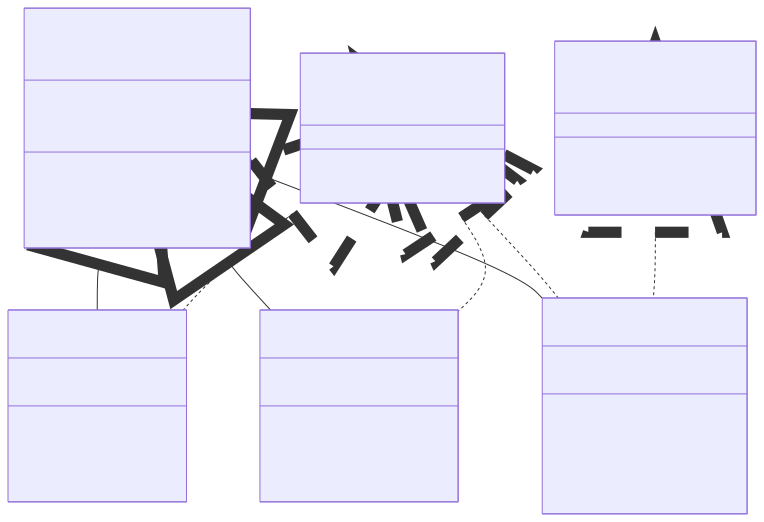

In [10]:
# @title
mm("""
classDiagram
    class PixarCharacter {
        <<abstract>>
        -String name
        -String movie
        +introduce()
        +perform()* abstract
        +getName() String
    }
    class Quotable {
        <<interface>>
        +getQuote() String
    }
    class Rescuable {
        <<interface>>
        +rescue(who)
        +canFly() boolean
    }
    class Toy {
        -String owner
        +perform()
        +getQuote() String
        +getPlayed()
    }
    class Monster {
        -double scareRating
        +perform()
        +getQuote() String
        +scare()
    }
    class Superhero {
        -String power
        +perform()
        +getQuote() String
        +rescue(who)
        +canFly() boolean
    }
    PixarCharacter <|-- Toy
    PixarCharacter <|-- Monster
    PixarCharacter <|-- Superhero
    Quotable <|.. Toy
    Quotable <|.. Monster
    Quotable <|.. Superhero
    Rescuable <|.. Superhero
    """)

### 🚀 Program 4: Pixar Studio Simulator

This capstone program brings everything together: an abstract `PixarCharacter` class (with concrete `getName()`/`getMovie()` and abstract `perform()`), two interfaces (`Quotable` and `Rescuable`), and subclasses that implement various combinations. A `Studio` class manages an array of characters and demonstrates polymorphism with both the abstract class and the interfaces.

In [ ]:
%%writefile StudioSimulator.java
public class StudioSimulator {

    // ── Interfaces ───────────────────────────────────────────────────────────
    interface Quotable {
        String getQuote();   // Must return a memorable quote
    }

    interface Rescuable {
        void rescue(String who);  // Must be able to rescue someone
        boolean canFly();         // Must say whether they can fly
    }

    // ── Abstract Superclass ──────────────────────────────────────────────────
    static abstract class PixarCharacter {
        private String name;
        private String movie;

        public PixarCharacter(String name, String movie) {
            this.name = name;
            this.movie = movie;
        }

        // Concrete — all characters can introduce themselves the same way
        public void introduce() {
            System.out.println("--- " + name + " from " + movie + " ---");
        }

        // Abstract — no sensible default; every subclass must define this
        public abstract void perform();

        @Override
        public String toString() {
            return name + " (" + movie + ")";
        }

        public String getName()  { return name; }
        public String getMovie() { return movie; }
    }

    // ── Toy: extends abstract class, implements Quotable ─────────────────────
    static class Toy extends PixarCharacter implements Quotable {
        private String owner;

        public Toy(String name, String movie, String owner) {
            super(name, movie);
            this.owner = owner;
        }

        @Override
        public void perform() {
            System.out.println(getName() + " does the cowboy quick-draw for " + owner + "! 🤠");
        }

        @Override
        public String getQuote() {
            return "To infinity and beyond!";
        }
    }

    // ── Monster: extends abstract class, implements Quotable ─────────────────
    static class Monster extends PixarCharacter implements Quotable {
        private double scareRating;

        public Monster(String name, String movie, double scareRating) {
            super(name, movie);
            this.scareRating = scareRating;
        }

        @Override
        public void perform() {
            System.out.println(getName() + " roars! (Scare rating: " + scareRating + ") 👾");
        }

        @Override
        public String getQuote() {
            return "We scare because we care.";
        }
    }

    // ── Superhero: extends abstract class, implements BOTH interfaces ─────────
    static class Superhero extends PixarCharacter implements Quotable, Rescuable {
        private String power;
        private boolean flight;

        public Superhero(String name, String movie, String power, boolean flight) {
            super(name, movie);
            this.power = power;
            this.flight = flight;
        }

        @Override
        public void perform() {
            System.out.println(getName() + " demonstrates " + power + "! 💥");
        }

        @Override
        public String getQuote() {
            return "Superheroes don't get sick days.";
        }

        @Override
        public void rescue(String who) {
            System.out.println(getName() + " uses " + power + " to rescue " + who + "! 🦸");
        }

        @Override
        public boolean canFly() { return flight; }
    }

    // ── Studio Manager ────────────────────────────────────────────────────────
    static class Studio {
        private PixarCharacter[] roster;

        public Studio(PixarCharacter[] roster) {
            this.roster = roster;
        }

        public void runShow() {
            System.out.println("\n=== Pixar Studio Show ===");
            for (PixarCharacter c : roster) {
                c.introduce();
                c.perform();          // Polymorphic dispatch (abstract method)

                // Interface polymorphism — check if this character is Quotable
                if (c instanceof Quotable) {
                    Quotable q = (Quotable) c;
                    System.out.println("  Quote: \"" + q.getQuote() + "\"");
                }
                System.out.println();
            }
        }

        public void runEmergency(String victim) {
            System.out.println("\n=== EMERGENCY: " + victim + " needs help! ===");
            boolean rescued = false;
            for (PixarCharacter c : roster) {
                if (c instanceof Rescuable) {
                    Rescuable r = (Rescuable) c;
                    r.rescue(victim);
                    System.out.println("  Can fly? " + r.canFly());
                    rescued = true;
                }
            }
            if (!rescued) {
                System.out.println("No one could help! (No Rescuable characters in roster)");
            }
        }
    }

    // ── Main ─────────────────────────────────────────────────────────────────
    public static void main(String[] args) {
        PixarCharacter[] cast = {
            new Toy("Woody", "Toy Story", "Andy"),
            new Monster("Sulley", "Monsters, Inc.", 9.7),
            new Superhero("Mr. Incredible", "The Incredibles", "super strength", false),
            new Superhero("Frozone", "The Incredibles", "ice powers", false)
        };

        Studio studio = new Studio(cast);
        studio.runShow();
        studio.runEmergency("Jack-Jack");
    }
}


In [ ]:
!javac StudioSimulator.java
!java StudioSimulator

### 📝 Problem 4: Pixar Game Engine

The starter code provides an abstract `GameObject` class and two interfaces: `Movable` and `Drawable`. Your tasks:

1. **Complete `PlayerCharacter`:** Extend `GameObject`, implement both `Movable` and `Drawable`. Add fields for `x`, `y` position and a `speed`. Implement `move(int dx, int dy)` (updates position), `draw()` (prints character at its position), `update()` (moves by speed in a random direction).

2. **Complete `Obstacle`:** Extend `GameObject`, implement `Drawable` only. Has a fixed position. Implement `draw()`.

3. **Complete `PowerUp`:** Extend `GameObject`, implement both `Movable` and `Drawable`. Implement all required methods.

4. **Write `runGameLoop(GameObject[] objects, int ticks)`:** Loop `ticks` times. Each tick: move all `Movable` objects, then draw all `Drawable` objects. Use `instanceof` for both checks.

5. **In `main`:** Create a game world with 2 PlayerCharacters, 3 Obstacles, and 2 PowerUps, then run the game loop for 3 ticks.

In [ ]:
%%writefile GameEngine.java
public class GameEngine {

    // ── Interfaces ───────────────────────────────────────────────────────────
    interface Movable {
        void move(int dx, int dy);   // Move by (dx, dy)
        void update();               // Auto-move based on internal logic
    }

    interface Drawable {
        void draw();   // Print a visual representation
    }

    // ── Abstract Base Class ───────────────────────────────────────────────────
    static abstract class GameObject {
        private String name;
        private String type;   // e.g., "player", "obstacle", "powerup"

        public GameObject(String name, String type) {
            this.name = name;
            this.type = type;
        }

        // Abstract — every game object must be able to describe itself
        public abstract String describe();

        @Override
        public String toString() { return "[" + type + "] " + name; }

        public String getName() { return name; }
        public String getType() { return type; }
    }

    // TODO 1: Complete PlayerCharacter
    // Extends GameObject, implements Movable AND Drawable
    // Fields: int x, int y, int speed
    // implement: move(), update(), draw(), describe()

    // TODO 2: Complete Obstacle
    // Extends GameObject, implements Drawable only
    // Fields: int x, int y
    // implement: draw(), describe()

    // TODO 3: Complete PowerUp
    // Extends GameObject, implements Movable AND Drawable
    // Fields: int x, int y, String effect
    // implement: move(), update(), draw(), describe()

    // TODO 4: Write runGameLoop(GameObject[] objects, int ticks)
    //   Each tick:
    //     - Print "=== Tick N ==="
    //     - Move all Movable objects (using instanceof + cast)
    //     - Draw all Drawable objects (using instanceof + cast)

    public static void main(String[] args) {
        // TODO 5: Create a game world with 2 PlayerCharacters, 3 Obstacles, 2 PowerUps
        // Store them in a GameObject[] array
        // Call runGameLoop(objects, 3)
    }
}


In [ ]:
!javac GameEngine.java
!java GameEngine

## Common Mistakes

Watch out for these frequent errors when working with inheritance and polymorphism:

| Mistake | What Happens | Fix |
|---------|-------------|-----|
| Forgetting `super()` in subclass constructor | Compile error if superclass has no no-arg constructor | Add `super(args...)` as the first line |
| Putting `super()` after other statements | Compile error — must be the first statement | Move `super()` to line 1 |
| Overloading instead of overriding | New method created silently; old behavior unchanged | Match name AND parameter list exactly; use `@Override` |
| Skipping `@Override` | Typos become silent overloads | Always use `@Override` — make the compiler check |
| Calling subclass-specific method through superclass ref | Compile error — not visible through superclass type | Check with `instanceof`, then downcast |
| Downcasting without `instanceof` | `ClassCastException` at runtime | Always check `instanceof` before downcasting |
| Instantiating an abstract class | Compile error | Create a concrete subclass instead |
| Forgetting to implement all interface methods | Compile error | Implement every method in every interface |
| Using `extends` for multiple classes | Compile error — Java allows only one | Use `implements` for additional contracts |
| Confusing `extends` and `implements` | Compile error | `extends` for classes, `implements` for interfaces |

## Summary

Congratulations — you've reached the end of Chapter 8! You now understand one of the most powerful ideas in object-oriented programming. Here are the key takeaways:

1. **Inheritance** lets a subclass extend a superclass, inheriting all non-private fields and methods. Use the `extends` keyword and verify with the is-a test.

2. **Constructors are never inherited.** Use `super(args)` as the first line of any subclass constructor to initialize the superclass portion of the object.

3. **Protected access** (`protected`) lets subclasses directly access superclass members while hiding them from the outside world.

4. **Method overriding** lets a subclass replace a superclass method with its own version. Always use `@Override` to let the compiler catch typos. Use `super.method()` when you want the parent's behavior plus your own additions.

5. **The `Object` class** is the root of all Java class hierarchies. Override `toString()` for readable output and `equals()` for value-based comparison.

6. **Polymorphism** means a superclass variable can hold a subclass object, and method calls dispatch to the subclass's overridden version at runtime. This is the big payoff of inheritance.

7. **`instanceof`** lets you check an object's actual type at runtime, enabling safe downcasting to access subclass-specific methods.

8. **Abstract classes** enforce a contract — subclasses *must* implement abstract methods — while still allowing shared code. You cannot instantiate an abstract class directly.

9. **Interfaces** are pure contracts (no shared fields or constructors). A class can implement many interfaces but extend only one class. Use interfaces for capabilities; use abstract classes for shared identity.

### The Pixar Metaphor, Summarized

| OOP Concept | Pixar Analogy |
|-------------|---------------|
| Superclass | Every Pixar character has a name and a movie |
| Subclass | Toys, Monsters, Superheroes each add their own twist |
| `super()` | Every character's backstory is rooted in the studio |
| Method overriding | Woody's catchphrase is different from Sulley's — same slot, different content |
| Polymorphism | The same casting call works for any character type |
| Abstract class | "Every character must be able to perform" — but how is up to them |
| Interface | Some characters are also Quotable, or Rescuable — mix and match abilities |

## Glossary

| Term | Definition |
|------|------------|
| **Superclass** | The parent class being extended; also called base class or parent class |
| **Subclass** | The child class that extends a superclass; also called derived class or child class |
| **`extends`** | Keyword used to declare that one class inherits from another |
| **`super()`** | Call to the superclass constructor from a subclass constructor; must be the first statement |
| **`super.method()`** | Call to the superclass version of a method from an overriding subclass method |
| **Inheritance** | A mechanism where a subclass automatically gains the non-private fields and methods of its superclass |
| **`protected`** | Access modifier that allows access within the same class, subclasses, and same package, but not from arbitrary outside code |
| **Method overriding** | Providing a new implementation of an inherited method in a subclass with the same name and parameter list |
| **`@Override`** | Annotation that tells the compiler to verify this method truly overrides a superclass method |
| **Method overloading** | Multiple methods in the same class with the same name but different parameter lists |
| **`Object` class** | The root of the Java class hierarchy; every class implicitly extends it |
| **`toString()`** | `Object` method that returns a string representation; override it for meaningful output |
| **`equals()`** | `Object` method for comparing objects; defaults to reference comparison; override for value comparison |
| **Polymorphism** | The ability of a superclass reference to hold a subclass object, and for method calls to dispatch to the correct overridden version at runtime |
| **Dynamic dispatch** | Java's runtime mechanism for calling the correct overridden method based on the actual object type |
| **`instanceof`** | Operator that tests whether an object is of a given type (or a subtype) |
| **Downcasting** | Casting a superclass reference to a more specific subclass type; requires `instanceof` check first |
| **`ClassCastException`** | Runtime exception thrown when an illegal downcast is attempted |
| **Abstract method** | A method with no body declared with the `abstract` keyword; must be implemented by concrete subclasses |
| **Abstract class** | A class containing at least one abstract method; cannot be instantiated directly |
| **Concrete class** | A non-abstract class that implements all inherited abstract methods and can be instantiated |
| **Interface** | A reference type that declares method signatures (and optionally constants) as a pure contract |
| **`implements`** | Keyword used by a class to declare it fulfills an interface's contract |
| **`default` method** | A method in an interface that provides a default implementation (introduced in Java 8) |
| **Constructor chaining** | The sequence in which constructors call each other up the inheritance hierarchy via `super()` |
| **DRY Principle** | "Don't Repeat Yourself" — inheritance directly supports this by centralizing shared code in a superclass |